# Выбор локации для скважины

## Загрузка и подготовка данных

In [43]:
#ЗАГРУЗКА БИБЛИОТЕК
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tqdm.notebook import trange, tqdm
import random

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
display(geo_data_0)
geo_data_0.info()
print(geo_data_0[geo_data_0['product'] < 0].sum())
print(geo_data_0['id'].value_counts()) #ВЫВЕСТИ УНИКАЛЬНЫЕ ЗНАЧЕНИЯ, ПОСМОТРЕТЬ НЕ ПОВТОРЯЮТСЯ ЛИ id СКВАЖИН
print('')
display(geo_data_1)
geo_data_1.info()
print(geo_data_1[geo_data_1['product'] < 0].count())
print(geo_data_1['id'].value_counts())
print('')
display(geo_data_2)
geo_data_2.info()
print(geo_data_2[geo_data_2['product'] < 0].count())
print(geo_data_2['id'].value_counts())


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
A5aEY    2
bxg6G    2
AGS9W    2
QcMuo    2
74z30    2
        ..
TgfKt    1
Bpsqk    1
l2Ab8    1
5DSeZ    1
UbdOr    1
Name: id, Length: 99990, dtype: int64



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
LHZR0    2
5ltQ6    2
bfPNe    2
wt4Uk    2
FQGwN    1
        ..
rRhFx    1
obHFw    1
pekB1    1
dbbad    1
rsaEg    1
Name: id, Length: 99996, dtype: int64



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
VF7Jo    2
Vcm5J    2
KUPhW    2
xCHr8    2
asrDJ    1
        ..
dAP5b    1
CMBCo    1
hwyx7    1
t5nCC    1
is5Vt    1
Name: id, Length: 99996, dtype: int64


## Обучение и проверка модели

In [3]:
'''
features_0 = geo_data_0.drop(['id', 'product'], axis = 1)
target_0 = geo_data_0['product']
display(features_0)
display(target_0)
features_train, features_valid, target_train, target_valid = train_test_split(features_0, target_0, test_size = 0.25, random_state = 12345)
'''

,f0,f1,f2
0,0.705745,-0.497823,1.221170
1,1.334711,-0.340164,4.365080
2,1.022732,0.151990,1.419926
3,-0.032172,0.139033,2.978566
4,1.988431,0.155413,4.751769
...,...,...,...
99995,0.971957,0.370953,6.075346
99996,1.392429,-0.382606,1.273912
99997,1.029585,0.018787,-1.348308
99998,0.998163,-0.528582,1.583869


0        105.280062
1         73.037750
2         85.265647
3        168.620776
4        154.036647
            ...    
99995    110.744026
99996    122.346843
99997     64.375443
99998     74.040764
99999    149.633246
Name: product, Length: 100000, dtype: float64

In [4]:
'''
model_0 = LinearRegression()
model_0.fit(features_train, target_train)
predictions_valid = model_0.predict(features_valid)

result = mean_squared_error(target_valid, predictions_valid)**0.5
print("RMSE модели линейной регрессии на валидационной выборке:", result)
print(numpy.mean(predictions_valid))
'''

RMSE модели линейной регрессии на валидационной выборке: 37.5794217150813
92.59256778438038


In [5]:
#ЗАДАЧА: ОБЪЕДИНИТЬ ТАБЛИЦЫ, ПОРАБОТАТЬ С id СКВАЖИН

In [6]:
'''
features_1 = geo_data_1.drop(['id', 'product'], axis = 1)
target_1 = geo_data_1['product']
display(features_1)
display(target_1)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, test_size = 0.25, random_state = 12345)
'''

,f0,f1,f2
0,-15.001348,-8.276000,-0.005876
1,14.272088,-3.475083,0.999183
2,6.263187,-5.948386,5.001160
3,-13.081196,-11.506057,4.999415
4,12.702195,-8.147433,5.004363
...,...,...,...
99995,9.535637,-6.878139,1.998296
99996,-10.160631,-12.558096,5.005581
99997,-7.378891,-3.084104,4.998651
99998,0.665714,-6.152593,1.000146


0          3.179103
1         26.953261
2        134.766305
3        137.945408
4        134.766305
            ...    
99995     53.906522
99996    137.945408
99997    137.945408
99998     30.132364
99999      3.179103
Name: product, Length: 100000, dtype: float64

In [7]:
'''
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predictions_valid_1 = model_1.predict(features_valid_1)

result_1 = mean_squared_error(target_valid_1, predictions_valid_1)**0.5
print("RMSE модели линейной регрессии на валидационной выборке:", result_1)
print(numpy.mean(predictions_valid_1))
'''

RMSE модели линейной регрессии на валидационной выборке: 0.893099286775616
68.728546895446


In [8]:
'''
features_2 = geo_data_2.drop(['id', 'product'], axis = 1)
target_2 = geo_data_2['product']
display(features_2)
display(target_2)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size = 0.25, random_state = 12345)
'''

,f0,f1,f2
0,-1.146987,0.963328,-0.828965
1,0.262778,0.269839,-2.530187
2,0.194587,0.289035,-5.586433
3,2.236060,-0.553760,0.930038
4,-0.515993,1.716266,5.899011
...,...,...,...
99995,-1.777037,1.125220,6.263374
99996,-1.261523,-0.894828,2.524545
99997,-1.199934,-2.957637,5.219411
99998,-2.419896,2.417221,-5.548444


0         27.758673
1         56.069697
2         62.871910
3        114.572842
4        149.600746
            ...    
99995    172.327046
99996    138.748846
99997    157.080080
99998     51.795253
99999    102.775767
Name: product, Length: 100000, dtype: float64

In [9]:
'''
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predictions_valid_2 = model_2.predict(features_valid_2)

result_2 = mean_squared_error(target_valid_2, predictions_valid_2)**0.5
print("RMSE модели линейной регрессии на валидационной выборке:", result_2)
print(numpy.mean(predictions_valid_2))
'''

RMSE модели линейной регрессии на валидационной выборке: 40.02970873393434
94.96504596800489


####  Нормализуем данные

In [10]:
'''
from sklearn import preprocessing

geo_data_0 = geo_data_0.drop(['id'], axis = 1)
data_0 = preprocessing.normalize(geo_data_0, axis = 0)
scaled_df = pd.DataFrame(data_0, columns=['f0','f1','f2','product'])
print(scaled_df.head())
'''

         f0        f1        f2   product
0  0.002220 -0.002796  0.000942  0.003246
1  0.004199 -0.001910  0.003366  0.002252
2  0.003217  0.000854  0.001095  0.002629
3 -0.000101  0.000781  0.002297  0.005199
4  0.006255  0.000873  0.003665  0.004750


In [11]:
'''
features_0 = scaled_df.drop(['product'], axis = 1)
target_0 = scaled_df['product']
display(features_0)
display(target_0)
features_train, features_valid, target_train, target_valid = train_test_split(features_0, target_0, test_size = 0.25, random_state = 12345)
'''

,f0,f1,f2
0,0.002220,-0.002796,0.000942
1,0.004199,-0.001910,0.003366
2,0.003217,0.000854,0.001095
3,-0.000101,0.000781,0.002297
4,0.006255,0.000873,0.003665
...,...,...,...
99995,0.003058,0.002083,0.004685
99996,0.004380,-0.002149,0.000982
99997,0.003239,0.000106,-0.001040
99998,0.003140,-0.002969,0.001221


0        0.003246
1        0.002252
2        0.002629
3        0.005199
4        0.004750
           ...   
99995    0.003415
99996    0.003773
99997    0.001985
99998    0.002283
99999    0.004614
Name: product, Length: 100000, dtype: float64

In [12]:
'''
model_0 = LinearRegression()
model_0.fit(features_train, target_train)
predictions_valid = model_0.predict(features_valid)

result = mean_squared_error(target_valid, predictions_valid)**0.5
print("RMSE модели линейной регрессии на валидационной выборке:", result)
print(numpy.mean(predictions_valid))
'''

RMSE модели линейной регрессии на валидационной выборке: 0.0011587488609720912
0.002855060763523507


# Вторая попытка

In [3]:
'''
features_0 = geo_data_0.drop(['id', 'product'], axis = 1)
id_0 = geo_data_0['id']
target_0 = geo_data_0['product']
print('target_0 MAX:', target_0.max())
print('target_0 MIN:', target_0.min())
display(features_0.head())
display(target_0.head())

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0,
                                                            target_0, test_size = 0.25, random_state = 12345)
'''

target_0 MAX: 185.3643474222929
target_0 MIN: 0.0


,f0,f1,f2
0,0.705745,-0.497823,1.221170
1,1.334711,-0.340164,4.365080
2,1.022732,0.151990,1.419926
3,-0.032172,0.139033,2.978566
4,1.988431,0.155413,4.751769


0    105.280062
1     73.037750
2     85.265647
3    168.620776
4    154.036647
Name: product, dtype: float64

In [4]:
'''
#МАСШТАБИРОВАНИЕ ПРИЗНАКОВ
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(features_train_0[numeric])
features_train_0[numeric] = scaler.transform(features_train_0[numeric])
features_valid_0[numeric] = scaler.transform(features_valid_0[numeric])

print(features_train_0)
'''
#display(features_train_0.corr())
#display(features_valid_0.corr())

             f0        f1        f2
27212 -0.544828  1.390264 -0.094959
7866   1.455912 -0.480422  1.209567
62041  0.260460  0.825069 -0.204865
70185 -1.837105  0.010321 -0.147634
82230 -1.299243  0.987558  1.273181
...         ...       ...       ...
4094   1.567114 -1.087243 -0.272211
85412 -1.904207 -0.525360  1.327530
2177   0.418949 -1.296788 -0.196407
77285  0.400077 -1.466874 -0.445317
86498  1.746246  0.027415  2.766848

[75000 rows x 3 columns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [5]:
'''
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predictions_valid_0 = model_0.predict(features_valid_0)
display(predictions_valid_0[:10])
display(target_valid_0[:10])


a = pd.DataFrame(data=dict(target_valid_0=target_valid_0, id_0=id_0), index=target_valid_0.index).reset_index().drop(['index', 'id_0'], axis = 1)
display(a)
b = {'predictions': predictions_valid_0}
df = pd.DataFrame(data=b)
display(df)

a_b = df.join(a)
display(a_b)
a_b_sorted = a_b.sort_values(by = 'predictions', ascending = False)
display('a_b_sorted', a_b_sorted)
print(a_b_sorted['predictions'].sum())

a_b_sorted_500 = a_b_sorted[:499]
print(a_b_sorted_500['predictions'].sum())


result = mean_squared_error(target_valid_0, predictions_valid_0)**0.5

print("RMSE модели линейной регрессии на валидационной выборке:", result)
print("Средний запас предсказанного сырья:", numpy.mean(predictions_valid_0))
print(numpy.mean(target_valid_0))
'''



'''
predicted_valid = pd.Series(target_train_0.mean(), index=target_valid_0.index)
mse = mean_squared_error(target_valid_0, predicted_valid_0)
print("RMSE =", mse ** 0.5)
'''

array([ 95.89495185,  77.57258261,  77.89263965,  90.17513418,
        70.51008829,  69.12707635, 125.10675866,  87.64384928,
        86.03587058,  98.65531069])

71751     10.038645
80493    114.551489
2655     132.603635
53233    169.072125
91141    122.325180
9539      37.735331
8482     139.227191
30284     72.491987
66393     11.465993
99584    110.562031
Name: product, dtype: float64

,target_valid_0
0,10.038645
1,114.551489
2,132.603635
3,169.072125
4,122.325180
...,...
24995,170.116726
24996,93.632175
24997,127.352259
24998,99.782700


,predictions
0,95.894952
1,77.572583
2,77.892640
3,90.175134
4,70.510088
...,...
24995,103.037104
24996,85.403255
24997,61.509833
24998,118.180397


,predictions,target_valid_0
0,95.894952,10.038645
1,77.572583,114.551489
2,77.892640,132.603635
3,90.175134,169.072125
4,70.510088,122.325180
...,...,...
24995,103.037104,170.116726
24996,85.403255,93.632175
24997,61.509833,127.352259
24998,118.180397,99.782700


'a_b_sorted'

,predictions,target_valid_0
9317,180.180713,162.810993
219,176.252213,153.639837
10015,175.850623,162.153488
11584,175.658429,96.893581
23388,173.299686,178.879516
...,...,...
23129,10.209351,49.374929
9078,8.798531,25.956984
21875,6.569477,46.546824
14503,4.980987,11.018692


2314814.194609509
74044.02418092043
RMSE модели линейной регрессии на валидационной выборке: 37.5794217150813
Средний запас предсказанного сырья: 92.59256778438038
92.07859674082927


'\npredicted_valid = pd.Series(target_train_0.mean(), index=target_valid_0.index)\nmse = mean_squared_error(target_valid_0, predicted_valid_0)\nprint("RMSE =", mse ** 0.5)\n'

In [6]:
'''
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(target_valid_0, predictions_valid)
'''

212.24513911488043

In [19]:
'''
from sklearn.metrics import mean_absolute_error

mean_absolute_error(target_valid_0, predictions_valid)
'''

30.919600777151313

In [6]:
'''
features_1 = geo_data_1.drop(['id', 'product'], axis = 1)
id_1 = geo_data_1['id']
target_1 = geo_data_1['product']
print('target_0 MAX:', target_1.max())
print('target_0 MIN:', target_1.min())
display(features_1.head())
display(target_1.head())
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1,
                                                            target_1, test_size = 0.25, random_state = 12345)
'''

target_0 MAX: 137.94540774090564
target_0 MIN: 0.0


,f0,f1,f2
0,-15.001348,-8.276000,-0.005876
1,14.272088,-3.475083,0.999183
2,6.263187,-5.948386,5.001160
3,-13.081196,-11.506057,4.999415
4,12.702195,-8.147433,5.004363


0      3.179103
1     26.953261
2    134.766305
3    137.945408
4    134.766305
Name: product, dtype: float64

In [7]:
'''
#МАСШТАБИРОВАНИЕ ПРИЗНАКОВ
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(features_train_1[numeric])
features_train_1[numeric] = scaler.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler.transform(features_valid_1[numeric])

print(features_train_1)
'''
#display(features_train_0.corr())
#display(features_valid_0.corr())

             f0        f1        f2
27212 -0.850855  0.624428  0.296943
7866   1.971935  1.832275  0.294333
62041  1.079305  0.170127 -0.296418
70185 -1.512028 -0.887837 -0.880471
82230 -1.804775 -0.718311 -0.293255
...         ...       ...       ...
4094  -0.334573 -0.005156  0.295560
85412  0.415280 -0.249559  0.877957
2177   1.047070 -0.649992  1.473368
77285 -0.114780 -1.190699  0.299156
86498 -0.646146  0.099075  0.295611

[75000 rows x 3 columns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [8]:
'''
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predictions_valid_1 = model_1.predict(features_valid_1)


a_1 = pd.DataFrame(data=dict(target_valid_1=target_valid_1, id_1=id_1), index=target_valid_1.index).reset_index()
display(a_1)
b_1 = {'predictions': predictions_valid_1}
df_1 = pd.DataFrame(data=b_1)
display(df_1)

a_b_1 = df_1.join(a_1)
display(a_b_1)
a_b_1_sorted = a_b_1.sort_values(by = 'predictions', ascending = False)
display(a_b_1_sorted)
print(a_b_1_sorted['predictions'].sum())

a_b_1_sorted_500 = a_b_1_sorted[:499]
print('Сумма предсказанного сырья лучших 500 скважин(тыс. баррелей):', a_b_1_sorted_500['predictions'].sum())
print('')


result = mean_squared_error(target_valid_1, predictions_valid_1)**0.5
print("RMSE модели линейной регрессии на валидационной выборке:", result)
print("Средний запас предсказанного сырья:", numpy.mean(predictions_valid_1))
print(numpy.mean(target_valid_1))
'''




'''
predicted_valid_1 = pd.Series(target_train_1.mean(), index=target_valid_1.index)
mse = mean_squared_error(target_valid_1, predicted_valid_1)
print("RMSE =", mse ** 0.5)
'''

,index,target_valid_1,id_1
0,71751,80.859783,aTbUt
1,80493,53.906522,CK34V
2,2655,30.132364,ioXCO
3,53233,53.906522,xk6tF
4,91141,0.000000,F9AmG
...,...,...,...
24995,12581,137.945408,fJBfd
24996,18456,110.992147,paaof
24997,73035,137.945408,tOADJ
24998,63834,84.038886,AiZ1G


,predictions
0,82.663314
1,54.431786
2,29.748760
3,53.552133
4,1.243856
...,...
24995,136.869211
24996,110.693465
24997,137.879341
24998,83.761966


,predictions,index,target_valid_1,id_1
0,82.663314,71751,80.859783,aTbUt
1,54.431786,80493,53.906522,CK34V
2,29.748760,2655,30.132364,ioXCO
3,53.552133,53233,53.906522,xk6tF
4,1.243856,91141,0.000000,F9AmG
...,...,...,...,...
24995,136.869211,12581,137.945408,fJBfd
24996,110.693465,18456,110.992147,paaof
24997,137.879341,73035,137.945408,tOADJ
24998,83.761966,63834,84.038886,AiZ1G


,predictions,index,target_valid_1,id_1
20430,139.818970,38665,137.945408,vz1OW
7777,139.773423,20191,137.945408,4zwHI
8755,139.703330,14041,137.945408,vd9ik
1178,139.560938,24274,137.945408,dRAMT
4285,139.516754,92782,137.945408,f8SBE
...,...,...,...,...
5085,-1.634717,21570,0.000000,cSzX2
12426,-1.693844,97894,0.000000,Tnwmh
9852,-1.871442,92993,0.000000,OqQ7s
5617,-1.883737,1411,0.000000,tKumj


1718213.6723861503
Сумма предсказанного сырья лучших 500 скважин(тыс. баррелей): 69058.28971905971

RMSE модели линейной регрессии на валидационной выборке: 0.8930992867756158
Средний запас предсказанного сырья: 68.728546895446
68.72313602435997


'\npredicted_valid_1 = pd.Series(target_train_1.mean(), index=target_valid_1.index)\nmse = mean_squared_error(target_valid_1, predicted_valid_1)\nprint("RMSE =", mse ** 0.5)\n'

In [20]:
'''
mean_absolute_error(target_valid_1, predictions_valid_1)
'''

0.718766244212475

In [9]:
'''
features_2 = geo_data_2.drop(['id', 'product'], axis = 1)
id_2 = geo_data_2['id']
target_2 = geo_data_2['product']
print('target_0 MAX:', target_2.max())
print('target_0 MIN:', target_2.min())
display(features_2.head())
display(target_2.head())
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2,
                                                            target_2, test_size = 0.25, random_state = 12345)
'''

target_0 MAX: 190.02983834335132
target_0 MIN: 0.0


,f0,f1,f2
0,-1.146987,0.963328,-0.828965
1,0.262778,0.269839,-2.530187
2,0.194587,0.289035,-5.586433
3,2.236060,-0.553760,0.930038
4,-0.515993,1.716266,5.899011


0     27.758673
1     56.069697
2     62.871910
3    114.572842
4    149.600746
Name: product, dtype: float64

In [10]:
#МАСШТАБИРОВАНИЕ ПРИЗНАКОВ
'''
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(features_train_2[numeric])
features_train_2[numeric] = scaler.transform(features_train_2[numeric])
features_valid_2[numeric] = scaler.transform(features_valid_2[numeric])

print(features_train_2)
'''
#display(features_train_0.corr())
#display(features_valid_0.corr())

             f0        f1        f2
27212 -0.526160  0.776329 -0.400793
7866  -0.889625 -0.404070 -1.222936
62041 -1.133984  0.208576  0.296765
70185  1.227045  1.570166 -0.764556
82230 -0.194289  0.878312  0.840821
...         ...       ...       ...
4094  -1.815240  0.398261  1.821017
85412 -0.274576 -1.265211  0.245519
2177   0.368564  0.797225  0.665575
77285 -2.440690  0.113784  0.440907
86498 -1.732468  0.393573 -1.424465

[75000 rows x 3 columns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [11]:
'''
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predictions_valid_2 = model_2.predict(features_valid_2)


a_2 = pd.DataFrame(data=dict(target_valid_2=target_valid_2, id_2=id_2), index=target_valid_2.index).reset_index()
display(a_2)
b_2 = {'predictions': predictions_valid_2}
df_2 = pd.DataFrame(data=b_2)
display(df_2)

a_b_2 = df_1.join(a_2)
display(a_b_2)
a_b_2_sorted = a_b_2.sort_values(by = 'predictions', ascending = False)
display(a_b_2_sorted)
print(a_b_2_sorted['predictions'].sum())

a_b_2_sorted_500 = a_b_2_sorted[:499]
print(a_b_2_sorted_500['predictions'].sum())



result = mean_squared_error(target_valid_2, predictions_valid_2)**0.5
print("RMSE модели линейной регрессии на валидационной выборке:", result)
print("Средний запас предсказанного сырья:", numpy.mean(predictions_valid_2))
print(numpy.mean(target_valid_2))
'''


'''
predicted_valid_2 = pd.Series(target_train_2.mean(), index=target_valid_2.index)
mse = mean_squared_error(target_valid_2, predicted_valid_2)
print("RMSE =", mse ** 0.5)
'''

,index,target_valid_2,id_2
0,71751,61.212375,DMlgl
1,80493,41.850118,tbrRC
2,2655,57.776581,JRs1w
3,53233,100.053761,bidOx
4,91141,109.897122,AcBBB
...,...,...,...
24995,12581,28.492402,y2n7n
24996,18456,21.431303,aBi2q
24997,73035,125.487229,CMYf3
24998,63834,99.422903,HzkKW


,predictions
0,93.599633
1,75.105159
2,90.066809
3,105.162375
4,115.303310
...,...
24995,78.765887
24996,95.603394
24997,99.407281
24998,77.779912


,predictions,index,target_valid_2,id_2
0,82.663314,71751,61.212375,DMlgl
1,54.431786,80493,41.850118,tbrRC
2,29.748760,2655,57.776581,JRs1w
3,53.552133,53233,100.053761,bidOx
4,1.243856,91141,109.897122,AcBBB
...,...,...,...,...
24995,136.869211,12581,28.492402,y2n7n
24996,110.693465,18456,21.431303,aBi2q
24997,137.879341,73035,125.487229,CMYf3
24998,83.761966,63834,99.422903,HzkKW


,predictions,index,target_valid_2,id_2
20430,139.818970,38665,61.222718,Eh3tl
7777,139.773423,20191,136.971772,w2rRP
8755,139.703330,14041,112.926727,sItYB
1178,139.560938,24274,48.567317,qlSZy
4285,139.516754,92782,130.191893,HaWrQ
...,...,...,...,...
5085,-1.634717,21570,63.151379,3j19T
12426,-1.693844,97894,158.488233,MRNia
9852,-1.871442,92993,52.655609,UxEYb
5617,-1.883737,1411,119.895124,Uu2Jc


1718213.6723861503
69058.28971905971
RMSE модели линейной регрессии на валидационной выборке: 40.02970873393434
Средний запас предсказанного сырья: 94.96504596800489
94.88423280885438


'\npredicted_valid_2 = pd.Series(target_train_2.mean(), index=target_valid_2.index)\nmse = mean_squared_error(target_valid_2, predicted_valid_2)\nprint("RMSE =", mse ** 0.5)\n'

In [21]:
mean_absolute_error(target_valid_2, predictions_valid_2)

32.792652105481814

Ниже (до пункта 3) я полностью переделал проект.

In [31]:
def features_target(df):
    features = df.drop(['id', 'product'], axis = 1)
    target = df['product']
    return features, target
    
features_0,target_0 = features_target(geo_data_0)
features_1,target_1 = features_target(geo_data_1)
features_2,target_2 = features_target(geo_data_2)

display(geo_data_0.corr()) #для наглядности можно использовать heatmap

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [4]:
display(features_0[:5])
display(target_0[:5])

,f0,f1,f2
0,0.705745,-0.497823,1.221170
1,1.334711,-0.340164,4.365080
2,1.022732,0.151990,1.419926
3,-0.032172,0.139033,2.978566
4,1.988431,0.155413,4.751769


0    105.280062
1     73.037750
2     85.265647
3    168.620776
4    154.036647
Name: product, dtype: float64

In [30]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0,
                                                            target_0, test_size = 0.25, random_state = 12345)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1,
                                                            target_1, test_size = 0.25, random_state = 12345)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2,
                                                            target_2, test_size = 0.25, random_state = 12345)

In [6]:
#МАСШТАБИРОВАНИЕ ПРИЗНАКОВ
def scaler(features_train, feature_target):
    s_caler = StandardScaler()
    s_caler.fit(features_train)
    train = s_caler.transform(features_train)
    valid = s_caler.transform(feature_target)
    return train, valid

In [7]:
features_train_0, features_valid_0 = scaler(features_train_0, features_valid_0)
features_train_1, features_valid_1 = scaler(features_train_1, features_valid_1)
features_train_2, features_valid_2 = scaler(features_train_2, features_valid_2)

In [8]:
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predictions_valid_0 = model_0.predict(features_valid_0)
predictions_valid_0_mean = predictions_valid_0.mean()

In [9]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predictions_valid_1 = model_1.predict(features_valid_1)
predictions_valid_1_mean = predictions_valid_1.mean()

In [10]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predictions_valid_2 = model_2.predict(features_valid_2)
predictions_valid_2_mean = predictions_valid_2.mean()

In [11]:
#ФУНКЦИЯ ДЛЯ РАСЧЁТА МЕТРИК
def metrics(target_valid, target_predictions):
    rmse = mean_squared_error(target_valid, target_predictions)**0.5
    r_2 = r2_score(target_valid, target_predictions)
    mae = mean_absolute_error(target_valid, target_predictions)
    return rmse, r_2, mae

In [15]:
#ФУНКЦИЯ ДЛЯ ВЫВОДА МЕТРИК
def output_metrics(model, target_valid, target_predictions, X, name, predict_mean):
    rmse, r_2, mae = metrics(target_valid, target_predictions)
    df_coef = pd.DataFrame(data = model.coef_, index = X.columns).rename({0:('coef'+'_'+name)}, axis = 1)
    df_metrics = pd.DataFrame(data = [rmse, r_2, mae, predict_mean], index = ['RMSE', 'R_2', 'MAE', 'predict_mean']).rename({0:name}, axis = 1)
    return df_coef, df_metrics

In [21]:
#geo_0_predict, geo_0_predict_mean, geo_0_model = LR_model(features_train_0, target_train_0, features_valid_0)
geo_data_0_coef_lr, geo_data_0_metrics_lr = output_metrics(model_0, target_valid_0, predictions_valid_0, features_0, 'geo_data_0', predictions_valid_0_mean)
geo_data_1_coef_lr, geo_data_1_metrics_lr = output_metrics(model_1, target_valid_1, predictions_valid_1, features_1, 'geo_data_1', predictions_valid_1_mean)
geo_data_2_coef_lr, geo_data_2_metrics_lr = output_metrics(model_2, target_valid_2, predictions_valid_2, features_2, 'geo_data_2', predictions_valid_2_mean)

geo_metrics = geo_data_0_metrics_lr.join(geo_data_1_metrics_lr)
geo_metrics = geo_data_2_metrics_lr.join(geo_metrics).T
display(geo_metrics)

geo_coeff = geo_data_0_coef_lr.join(geo_data_1_coef_lr.join(geo_data_2_coef_lr))
display(geo_coeff)

,RMSE,R_2,MAE,predict_mean
geo_data_2,40.029709,0.205248,32.792652,94.965046
geo_data_0,37.579422,0.279943,30.919601,92.592568
geo_data_1,0.893099,0.999623,0.718766,68.728547


,coef_geo_data_0,coef_geo_data_1,coef_geo_data_2
f0,3.132274,-1.299483,0.053581
f1,-7.108177,-0.112935,-0.072505
f2,21.425564,45.886033,19.819652


- самым значимым коэффициентом в регионах считается коэффициент "f2"
- метрики в регионах 1 и 3 имеют примерно одни значения RMSE(37-40) и MAE(31-33)
- метрики в регионе 2 значительно отличаются (RMSE - 0.9, MAE - 0.7)

Объединим значения предсказаные с имеющимися:

In [28]:
df_0 = pd.DataFrame(predictions_valid_0)
df_0.index = target_valid_0.index
df_0 = df_0.join(target_valid_0)
df_0 = df_0.rename(columns = {0:'predict', 'product':'target'})
display(df_0)

df_1 = pd.DataFrame(predictions_valid_1)
df_1.index = target_valid_1.index
df_1 = df_1.join(target_valid_1)
df_1 = df_1.rename(columns = {0:'predict', 'product':'target'})
display(df_1)

df_2 = pd.DataFrame(predictions_valid_2)
df_2.index = target_valid_2.index
df_2 = df_2.join(target_valid_2)
df_2 = df_2.rename(columns = {0:'predict', 'product':'target'})
display(df_2)


,predict,target
71751,95.894952,10.038645
80493,77.572583,114.551489
2655,77.892640,132.603635
53233,90.175134,169.072125
91141,70.510088,122.325180
...,...,...
12581,103.037104,170.116726
18456,85.403255,93.632175
73035,61.509833,127.352259
63834,118.180397,99.782700


,predict,target
71751,82.663314,80.859783
80493,54.431786,53.906522
2655,29.748760,30.132364
53233,53.552133,53.906522
91141,1.243856,0.000000
...,...,...
12581,136.869211,137.945408
18456,110.693465,110.992147
73035,137.879341,137.945408
63834,83.761966,84.038886


,predict,target
71751,93.599633,61.212375
80493,75.105159,41.850118
2655,90.066809,57.776581
53233,105.162375,100.053761
91141,115.303310,109.897122
...,...,...
12581,78.765887,28.492402
18456,95.603394,21.431303
73035,99.407281,125.487229
63834,77.779912,99.422903


# Вывод:
- разбил датасет на тренировочную и валидационную выборки;
- значения RMSE очень большие, значит модели имеют высокую погрешность;
- самая лучшая модель с минимальной погрешностью: линейная регрессия по geo_data_1;
- коэффициент детерминации невысокий, значит предсказания неточны, кроме R2 по региону geo_data_1;

## Подготовка к расчёту прибыли

# Вторая попытка

### Достаточный объём сырья для безубыточной разработки новой скважины

In [15]:
'''
print('Максимальный объём сырья на один регион(тыс. баррелей):', 10000000000/(450*1000))
print('Максимальный объём сырья на одну скважину региона(тыс. баррелей):', 10000000000/(450*10000*1000))
print('Cредний запас в каждом регионе №1:', a_b_sorted_500['predictions'].mean() * 1000)
print('Cредний запас в каждом регионе №2:', a_b_1_sorted_500['predictions'].mean() * 1000)
print('Cредний запас в каждом регионе №3:', a_b_2_sorted_500['predictions'].mean() * 1000)
'''

Максимальный объём сырья на один регион(тыс. баррелей): 22222.222222222223
Максимальный объём сырья на одну скважину региона(тыс. баррелей): 2.2222222222222223
Cредний запас в каждом регионе №1: 148384.81799783654
Cредний запас в каждом регионе №2: 138393.36617046036
Cредний запас в каждом регионе №3: 138393.36617046036


<div class="alert alert-block alert-danger">
<b>Ошибка[4]:</b> Чтобы посчитать значения для безубыточной разработки на одну скважину нужно использовать формулу: 
    
    бюджет / цену за 1 барель / кол-во используемых скважин
И сделать вывод опираясь на значения посчитанные на предыдущем шаге.
</div>

<div class="alert alert-block alert-info">
<h1> Комментарий от студента после четвёртого ревью:</h1>
Но я ведь так и сделал, при учёте того, что мы выбираем 500 скважин.</div>

<div class="alert alert-block alert-info">
<b>Ответ[5]:</b>  Но мы ведь будем использовать 200 скважин, а не 500 =).
</div>

## Расчёт прибыли и рисков 

### Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [37]:
'''
budget = 10000000000


def profit(data):
    q = data['predictions'].sum()*450000
    if q > budget:
        p = q - budget
        return p
    else: 
        l = budget - q
        return l
    #return q/1000000000
    #print(q/1000000000, 'млрд. рублей')


print('1 скважина:', profit(a_b_sorted_500), 'рублей')
print('2 скважина:', profit(a_b_1_sorted_500), 'рублей')
print('3 скважина:', profit(a_b_2_sorted_500), 'рублей')
'''

1 скважина: 23319810881.414192 рублей
2 скважина: 21076230373.57687 рублей
3 скважина: 21076230373.57687 рублей


In [24]:
'''
display(predictions_valid_0)
'''

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

In [36]:
'''
state = np.random.RandomState(12345)
#prediction_0 = pd.Series(predictions_valid_0)
#display(prediction_0)
values_0 = []
for i in range(1000):
    prediction_subsample = df.sample(500, replace = True, random_state = state)
    values_0.append(profit(prediction_subsample))
    
values_0 = pd.Series(values_0)
values_0
'''

0      1.090409e+10
1      1.100273e+10
2      1.071860e+10
3      1.083863e+10
4      1.101411e+10
           ...     
995    1.061369e+10
996    1.127842e+10
997    1.090377e+10
998    1.097207e+10
999    1.077929e+10
Length: 1000, dtype: float64

In [58]:
#МИНИМАЛЬНЫЙ ОБЪЁМ СКВАЖИНЫ ДЛЯ БЕЗУБЫТОЧНОЙ РАБОТЫ
min_volume = 10e9/450000/200
print(min_volume, 'тысяч баррелей.')

111.11111111111111 тысяч баррелей.


In [59]:
delta_0 = (1-predictions_valid_0_mean/min_volume)*100
delta_1 = (1-predictions_valid_1_mean/min_volume)*100
delta_2 = (1-predictions_valid_2_mean/min_volume)*100

print('Средний объём скважины для региона 1 отличается от минимально необходимого на', delta_0, '%')
print('Средний объём скважины для региона 2 отличается от минимально необходимого на', delta_1, '%')
print('Средний объём скважины для региона 3 отличается от минимально необходимого на', delta_2, '%')

Средний объём скважины для региона 1 отличается от минимально необходимого на 16.666688994057665 %
Средний объём скважины для региона 2 отличается от минимально необходимого на 38.144307794098594 %
Средний объём скважины для региона 3 отличается от минимально необходимого на 14.531458628795601 %


# Вывод
- рассчитан минимальный объём одной скважины;
- во всех трёх регионах средний размер скважины ниже необходимого.

# Расчёт прибыли и рисков

In [60]:
geo_data_0_top_200 = df_0.sort_values(by = 'predict', ascending = False)[:200]
geo_data_1_top_200 = df_1.sort_values(by = 'predict', ascending = False)[:200]
geo_data_2_top_200 = df_2.sort_values(by = 'predict', ascending = False)[:200]
geo_data_0_top_200.head()

,predict,target
93073,180.180713,162.810993
46784,176.252213,153.639837
78948,175.850623,162.153488
43388,175.658429,96.893581
6496,173.299686,178.879516


In [61]:
#рассчитаем доход и прибыль по целевому признаку для 200 лучших точек
def income_profit(geo):
    income = geo.target.sum()*450000
    profit = income - budget
    print('Доход в регионе составит', income/1000, 'тысяч рублей.')
    print('Прибыль в регионе составит', profit/1000, 'тысяч рублей.')
    return income, profit

<div class="alert alert-block alert-info">
<b>Совет[5]:</b> Вместо "магических чисел" лучше использовать переменные.
</div>

In [74]:
print('Регион 1:') 
income_0, profit_0 = income_profit(geo_data_0_top_200)
print('Регион 2:') 
income_1, profit_1 = income_profit(geo_data_1_top_200)
print('Регион 3:') 
income_2, profit_2 = income_profit(geo_data_2_top_200)

Регион 1:
Доход в регионе составит 13320826.043139853 тысяч рублей.
Прибыль в регионе составит 3320826.0431398526 тысяч рублей.
Регион 2:
Доход в регионе составит 12415086.69668151 тысяч рублей.
Прибыль в регионе составит 2415086.696681511 тысяч рублей.
Регион 3:
Доход в регионе составит 12710349.963599833 тысяч рублей.
Прибыль в регионе составит 2710349.9635998327 тысяч рублей.


# Вывод:
- рассчитал доход и прибыль для регионов;
- лучшие финансовые показатели в регионе 1 (чуть больше, чем 3,3 млрд. рублей);

In [65]:
state = np.random.RandomState(12345)

def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending = False)
    selected = target[probs_sorted.index][:count]
    profit = (selected.sum()*450000 - 10e9)
    return profit

def bootstrap(geo, N, count):
    target = geo.target
    probabilities = geo.predict
    
    values = []
    for i in tqdm(range(1000)):
        target_sample = target.sample(n = N, replace = True, random_state = state)
        probabilities_sample = probabilities[target_sample.index]
        values.append(revenue(target_sample, probabilities_sample, count))
        
    values = pd.Series(values)
    lower_quantile = values.quantile(.025)
    upper_quantile = values.quantile(.975)

    mean = values.mean()/1000
    print('Средняя прибыль:', mean, 'тысяч рублей.')
    print(f'95%-ый доверительный интервал от {(lower_quantile/1000):.3} до {(upper_quantile/1000):.3} тысяч рублей')
    return values


Средняя прибыль: 425938.52691059234 тысяч рублей.
95%-ый доверительный интервал от -1.02e+05 до 9.48e+05 тысяч рублей


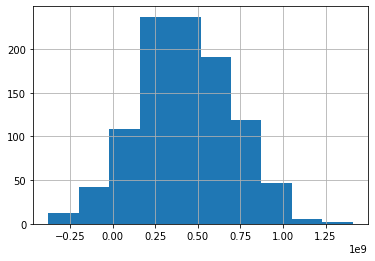

In [66]:
geo_0_values = bootstrap(df_0, 500, 200)
geo_0_values.hist()


Средняя прибыль: 518259.49369732494 тысяч рублей.
95%-ый доверительный интервал от 1.28e+05 до 9.54e+05 тысяч рублей


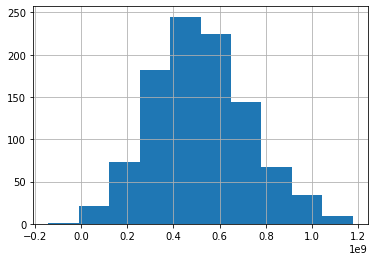

In [67]:
geo_1_values = bootstrap(df_1, 500, 200)
geo_1_values.hist()


Средняя прибыль: 420194.00534405006 тысяч рублей.
95%-ый доверительный интервал от -1.16e+05 до 9.9e+05 тысяч рублей


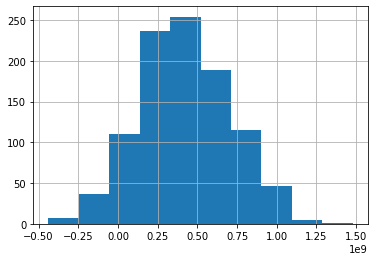

In [68]:
geo_2_values = bootstrap(df_2, 500, 200)
geo_2_values.hist()

In [69]:
# риск убытка geo_0
print(f'Для региона 1 риск получить убыток составляет {(geo_0_values[geo_0_values<0].shape[0]/geo_0_values.shape[0]):.2%}')

print(f'Для региона 2 риск получить убыток составляет {(geo_1_values[geo_1_values<0].shape[0]/geo_1_values.shape[0]):.2%}')

print(f'Для региона 3 риск получить убыток составляет {(geo_2_values[geo_2_values<0].shape[0]/geo_2_values.shape[0]):.2%}')

Для региона 1 риск получить убыток составляет 6.00%
Для региона 2 риск получить убыток составляет 0.30%
Для региона 3 риск получить убыток составляет 6.20%


# Вывод:
- лучший регион для ведения добычи это второй регион, так как риск убытка крайне мал (самый маленький), а прогнозируемая прибыль 518 млн (самая большая) рублей.